In [47]:
import time
import datetime
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import get_data
import numpy as np


In [48]:
Commodity_2001 = get_data("DJI", start_date="7/11/2001", end_date="01/1/2002", index_as_date = True, interval="1d")
GOLD_2001 = get_data("GOLD", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
RE_2001 = get_data("IYR", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
Equity_2001 = get_data("SPY", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")
fixed_income_2001 = get_data("VBMFX", start_date="7/11/2001", end_date="01/01/2002", index_as_date = True, interval="1d")

frames_2001 = [Commodity_2001,GOLD_2001,RE_2001,Equity_2001,fixed_income_2001]
event_2001 = pd.concat(frames_2001).drop(columns = ['open','high','low','adjclose','volume'])

event_2001

,close,ticker
2001-07-11,10241.000000,DJI
2001-07-12,10479.000000,DJI
2001-07-13,10539.099609,DJI
2001-07-16,10472.099609,DJI
2001-07-17,10606.400391,DJI
...,...,...
2001-12-24,10.100000,VBMFX
2001-12-26,10.080000,VBMFX
2001-12-27,10.110000,VBMFX
2001-12-28,10.100000,VBMFX


In [49]:
print(event_2001.columns)

Index(['close', 'ticker'], dtype='object')


In [50]:
event_2001 = event_2001.pivot(columns='ticker')

In [51]:
event_2001

close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2001-07-11  10241.000000  15.310000  40.299999  118.379997  10.08
2001-07-12  10479.000000  15.310000  40.695000  121.190002  10.10
2001-07-13  10539.099609  15.290000  40.860001  122.239998  10.10
2001-07-16  10472.099609  14.950000  40.814999  120.709999  10.11
2001-07-17  10606.400391  15.180000  40.834999  121.839996  10.12
...                  ...        ...        ...         ...    ...
2001-12-24  10035.299805  16.290001  39.750000  114.730003  10.10
2001-12-26  10088.099609  16.000000  39.799999  115.360001  10.08
2001-12-27  10131.299805  15.870000  39.900002  116.059998  10.11
2001-12-28  10137.000000  15.800000  40.125000  116.000000  10.10
2001-12-31  10021.500000  15.950000  39.900002  114.300003  10.14

[117 rows x 5 columns]

In [52]:
print(event_2001.columns)

MultiIndex([('close',   'DJI'),
            ('close',  'GOLD'),
            ('close',   'IYR'),
            ('close',   'SPY'),
            ('close', 'VBMFX')],
           names=[None, 'ticker'])


In [53]:
event_2001.describe

<bound method NDFrame.describe of                    close                                         
ticker               DJI       GOLD        IYR         SPY  VBMFX
2001-07-11  10241.000000  15.310000  40.299999  118.379997  10.08
2001-07-12  10479.000000  15.310000  40.695000  121.190002  10.10
2001-07-13  10539.099609  15.290000  40.860001  122.239998  10.10
2001-07-16  10472.099609  14.950000  40.814999  120.709999  10.11
2001-07-17  10606.400391  15.180000  40.834999  121.839996  10.12
...                  ...        ...        ...         ...    ...
2001-12-24  10035.299805  16.290001  39.750000  114.730003  10.10
2001-12-26  10088.099609  16.000000  39.799999  115.360001  10.08
2001-12-27  10131.299805  15.870000  39.900002  116.059998  10.11
2001-12-28  10137.000000  15.800000  40.125000  116.000000  10.10
2001-12-31  10021.500000  15.950000  39.900002  114.300003  10.14

[117 rows x 5 columns]>

In [54]:
# Calculate daily returns using the combined portfolio
daily_returns_event_2001 = event_2001.pct_change().dropna()

In [55]:
daily_returns_event_2001

close                                        
ticker           DJI      GOLD       IYR       SPY     VBMFX
2001-07-12  0.023240  0.000000  0.009802  0.023737  0.001984
2001-07-13  0.005735 -0.001306  0.004055  0.008664  0.000000
2001-07-16 -0.006357 -0.022237 -0.001101 -0.012516  0.000990
2001-07-17  0.012825  0.015385  0.000490  0.009361  0.000989
2001-07-18 -0.003451  0.021739  0.006367 -0.006812  0.003953
...              ...       ...       ...       ...       ...
2001-12-24  0.000000  0.001845  0.006966 -0.001914 -0.001976
2001-12-26  0.005261 -0.017802  0.001258  0.005491 -0.001980
2001-12-27  0.004282 -0.008125  0.002513  0.006068  0.002976
2001-12-28  0.000563 -0.004411  0.005639 -0.000517 -0.000989
2001-12-31 -0.011394  0.009494 -0.005607 -0.014655  0.003960

[116 rows x 5 columns]

In [73]:
# To calculate the annualized average return of event_2001,
trading_days_event_2001 = 117
average_annual_return__event_2001 = daily_returns_event_2001.mean() * trading_days_event_2001

In [74]:
average_annual_return__event_2001

       ticker
close  DJI      -0.010204
       GOLD      0.066823
       IYR      -0.005174
       SPY      -0.025180
       VBMFX     0.006480
dtype: float64

In [75]:
# To calculate the annualized standard deviation,
# multiply the standard deviation (std) for the daily_returns_a_b DataFrame
# by the square root (np.sqrt) of the number of trading days in the year
annual_std_dev_event_2001 = daily_returns_event_2001.std() * np.sqrt(trading_days_event_2001)

In [76]:
annual_std_dev_event_2001

       ticker
close  DJI       0.152466
       GOLD      0.227392
       IYR       0.099007
       SPY       0.143065
       VBMFX     0.031554
dtype: float64

In [77]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_event_2001 = average_annual_return__event_2001 / annual_std_dev_event_2001

In [78]:
sharpe_ratios_event_2001

       ticker
close  DJI      -0.066927
       GOLD      0.293866
       IYR      -0.052262
       SPY      -0.176004
       VBMFX     0.205371
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}, xlabel='None,ticker'>

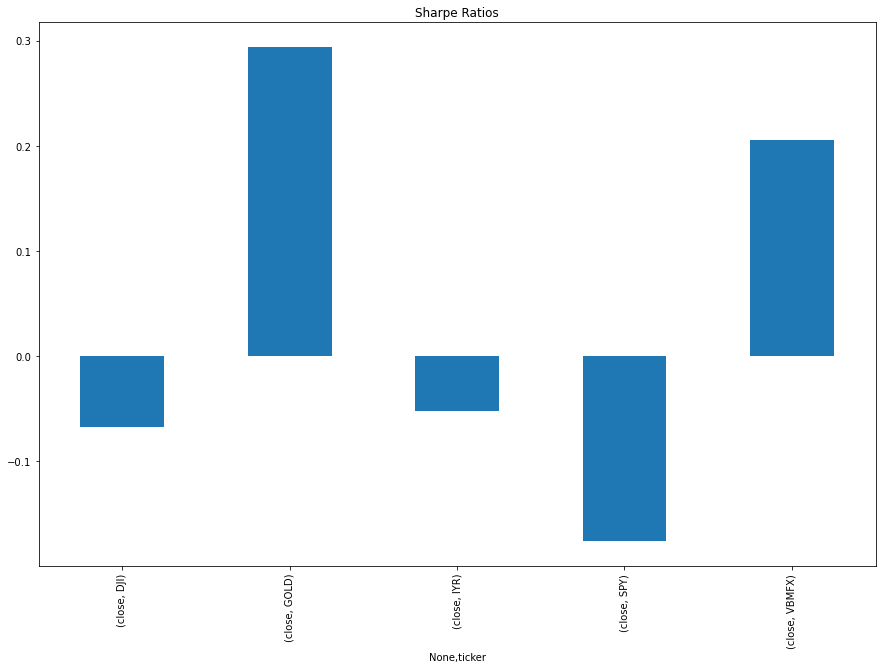

In [83]:
# Plotting the sharp ratios for securities
sharpe_ratios_event_2001.plot.bar(figsize=(15, 10), title="Sharpe Ratios")

<AxesSubplot:title={'center':'Daily Returns - Event 2001'}>

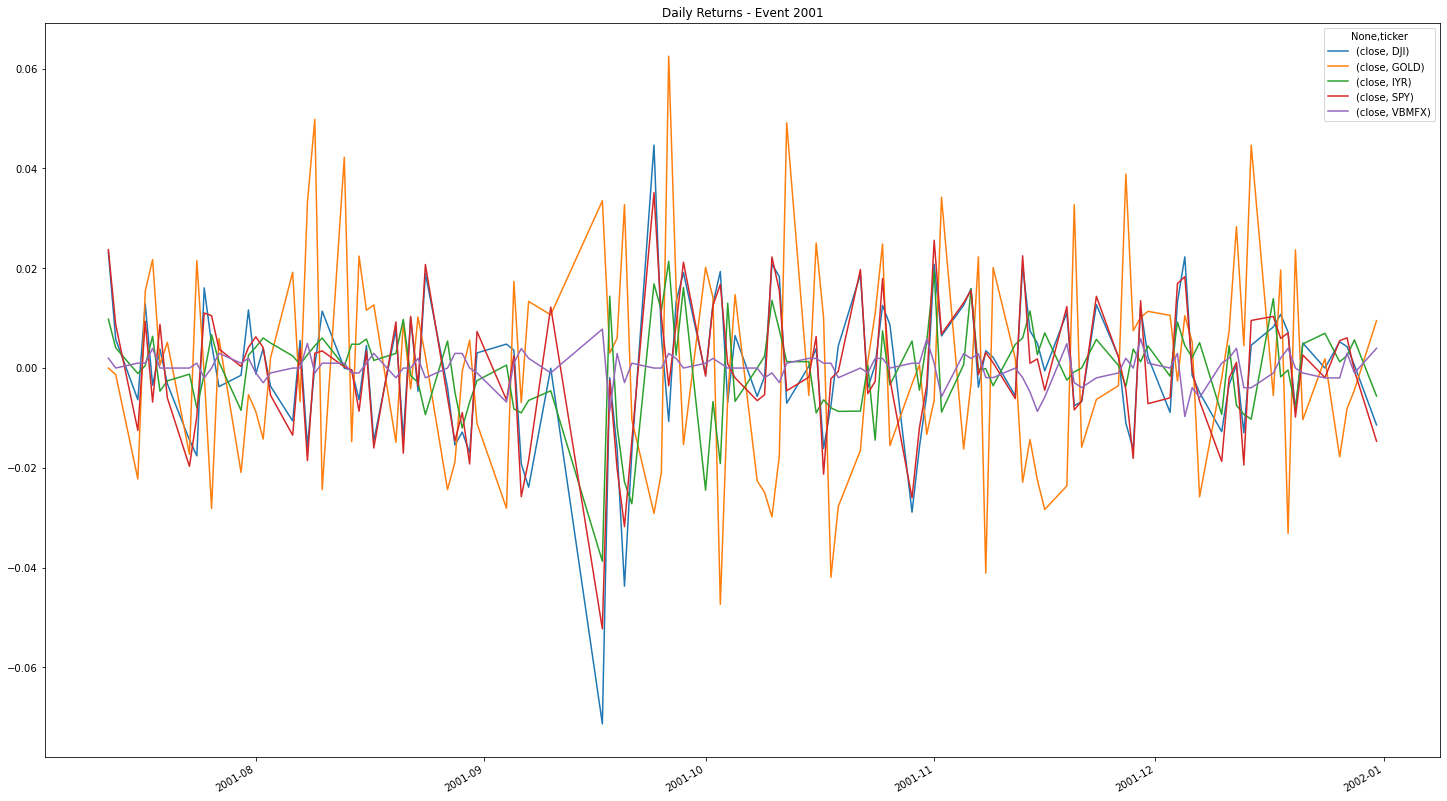

In [81]:
# Plotting the daily returns for securities
daily_returns_event_2001.plot(figsize=(25, 15), title="Daily Returns - Event 2001")